<a href="https://colab.research.google.com/github/RanjithK2608/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b><font color='red'> Capstone Project -4 Book Recommendation System

# <b><u> Project Title : Build a recommender engine that reviews customer ratings and recommend items and improve sales. </u></b>

#<b> Problem Statement:

####During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.


####In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
####Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

####Personal recommendation systems have been emerged to conduct effective search which related booksbased on user rating and interest.The proposed system used the K-NN Cosine Distance function to measure distance and Cosine Similarity function to find Similarity between the book clusters also we implemented SVD system that give us good recommandation.

## **About Recommendation Engines**
A recommendation engine, also known as a recommender system, is software that analyzes available data to make suggestions for something that a user might be interested in.

A recommendation engine can be used for recommending other products besides books; for example a recommendation engine can be used to suggest movies or t-shirts or any other product based on things like similar customers who bought similar products. On Amazon’s ecommerce website, you can see an area populated by a recommendation engine, it’s the area that you see “Customers who viewed this item also viewed” and “Customers who bought this item also bought” lists.

A recommendation system is usually built using 3 techniques which are **content-based filtering, collaborative filtering, and a combination of both**.

* **Content-based filtering**: 
The algorithm recommends a product that is similar to those which used as watched. In simple words, In this algorithm, we try to find finding item look alike. For example, a person likes to watch Sachin Tendulkar shots, so he may like watching Ricky Ponting shots too because the two videos have similar tags and similar categories.
Only it looks similar between the content and does not focus more on the person who is watching this. Only it recommends the product which has the highest score based on past preferences.

* **Collaborative filtering:**
Collaborative based filtering recommender systems are based on past interactions of users and target items.  In simple words here, we try to search for the look-alike customers and offer products based on what his or her lookalike has chosen. Let us understand with an example. X and Y are two similar users and X user has watched A, B, and C movie. And Y user has watched B, C, and D movie then we will recommend A movie to Y user and D movie to X user.
Youtube has shifted its recommendation system from content-based to Collaborative based filtering technique. If you have experienced sometimes there are also videos which not at all related to your history but then also it recommends it because the other person similar to you has watched it.

* **Hybrid Filtering Method:**
It is basically a combination of both the above methods. It is a too complex model which recommends product based on your history as well based on similar users like you.
There are some organizations that use this method like Facebook which shows news which is important for you and for others also in your network and the same is used by Linkedin too.

##**Dataset Description**
The Book-Crossing dataset comprises 3 files which contains 1.1 million ratings of 270,000 books by 90,000 users. The ratings are on a scale from 1 to 10.

* **Users**
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.
*  **Books**
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.
*  **Ratings**
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

#<b> Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import re
import pickle
import operator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

#<b>Importing Datasets

### <b> 1.Users Data

In [4]:
#users data
path = ('/content/drive/MyDrive/Capstone-4-Book Recommendation System/Datasets/Users.csv')
users = pd.read_csv(path)


In [5]:
#First 5 rows of dataset
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
#Last 5 rows of dataset
users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


###<b> 2.Books Data

In [7]:
#Books data
path = ('/content/drive/MyDrive/Capstone-4-Book Recommendation System/Datasets/Books.csv')
books = pd.read_csv(path)


In [8]:
#First 5 rows of dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
#Last 5 rows of dataset
books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


### <b> 3.Ratings Data

In [10]:
#Ratings Data
path = ('/content/drive/MyDrive/Capstone-4-Book Recommendation System/Datasets/Ratings.csv')
ratings = pd.read_csv(path)

In [11]:
#First 5 rows of dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
#Last 5 rows of dataset
ratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


#<b>Dimensions of Datasets

In [13]:
#checking shapes of the datasets
print(books.shape)
print(users.shape)
print(ratings.shape)


(271360, 8)
(278858, 3)
(1149780, 3)


####<b> The dataset is reliable and can consider as a large dataset.
 
We have around 270000 of Books data , 278858 of users data and around 11lakh of Ratings data

#<b>Data Preprocessing

#<b>1.Users Data

In [14]:
#printing first 5 rows
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [15]:
# getting info about user data
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [16]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


#<b>Users Missing Values

In [17]:
#let's look for missing data
missing_data = pd.DataFrame([users.isnull().sum(),users.isnull().sum()*100.0/users.shape[0]]).T
missing_data.columns = ['No. of Missing Data', '% Missing Data']
missing_data

,No. of Missing Data,% Missing Data
User-ID,0.0,0.000000
Location,0.0,0.000000
Age,110762.0,39.719857


So clearly in the above table Age has 39% of missing data

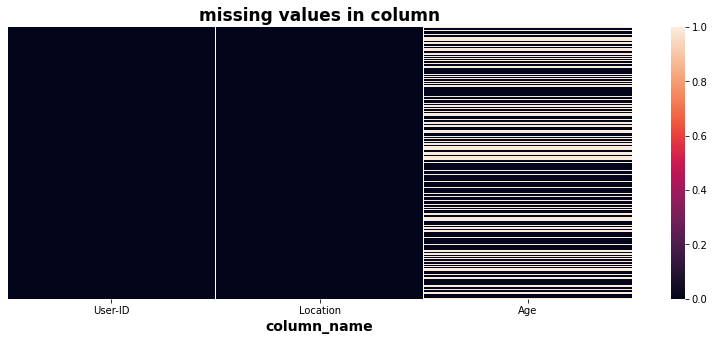

In [18]:
# Checking missing values
plt.figure(figsize=(14, 5))
sns.heatmap(users.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [19]:
## Checking all values present in Age column
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above.

In my view values below 5 and above 90 do not make much sense for our book rating case...hence replacing these by NaNs

In [20]:
# Replacing age below 5 and above 90 by NaNs
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

In [21]:
#Now, Replacing NaNs with mean
users['Age'].fillna((users['Age'].mean()), inplace=True)

In [22]:
#setting the data type as int
users.Age = users.Age.astype(np.int64)

In [23]:
# Users dataset information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       278858 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ MB


In [24]:
# Checking for any duplicate values
len(users[users.duplicated()])
# No duplicate

0

In [27]:
#checking null values
users.isnull().sum()


User-ID     0
Location    0
Age         0
dtype: int64

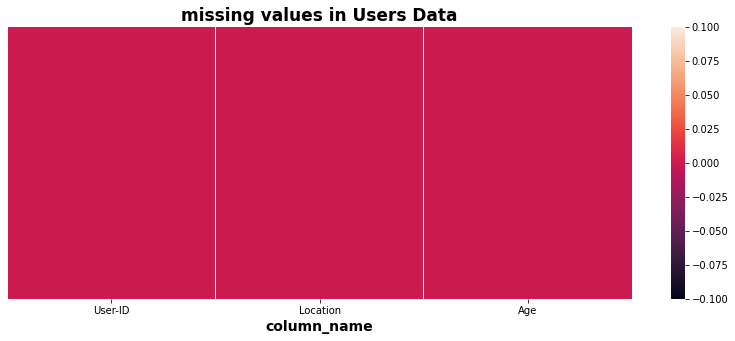

In [29]:
# Checking missing values
plt.figure(figsize=(14, 5))
sns.heatmap(users.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in Users Data",fontweight="bold",size=17)
plt.show()

So in Users dataset we have removed the null values and we don't have any missing value

#<b>2.Books Dataset